**1. Explain the difference between Relative , Absolute and Mixed Cell Referencing.
   You have the following dataset:
   Vehicle      -     Price
   Car                500000
   Bicycle           10500
   Auto-Rickshaw      25000**

Cell Referencing in Spreadsheets (and conceptually in data manipulation)

Cell referencing is how to refer to a cell or a range of cells in a formula. This concept is typically found in spreadsheet software like Microsoft Excel or Google Sheets, but its principles can be applied conceptually to data manipulation in programming, especially when performing operations that involve fixed or relative positions.

Here are the three main types:

1.  **Relative Reference (e.g., `A1`)**
    *   **Explanation**: This is the default type of cell reference. When a formula containing a relative reference is copied to another cell, the reference changes relative to the position of the new cell. If you copy a formula from `B1` to `B2`, a reference to `A1` in the original formula will automatically become `A2` in the copied formula.
    *   **Use Case**: Ideal when you want to repeat the same calculation across multiple rows or columns, where the input cells for the calculation also shift.

2.  **Absolute Reference (e.g., `$A$1`)**
    *   **Explanation**: An absolute reference always refers to the same cell, regardless of where the formula is copied. The dollar signs (`$`) fix both the column and the row.
    *   **Use Case**: Essential when you want a formula to always refer to a specific cell (e.g., a fixed tax rate, a constant value, or a total) even when the formula is moved or copied.

3.  **Mixed Reference (e.g., `A$1` or `$A1`)**
    *   **Explanation**: A mixed reference has either the column or the row fixed, but not both.
        *   `A$1` (Absolute row, Relative column): The row `1` is fixed, but the column `A` will change if the formula is copied horizontally.
        *   `$A1` (Relative row, Absolute column): The column `A` is fixed, but the row `1` will change if the formula is copied vertically.
    *   **Use Case**: Useful when you need to fix a reference along one axis (row or column) while allowing it to change along the other, often for creating multiplication tables or more complex calculations where one factor is constant across a row/column, but the other changes.

In [ ]:
import pandas as pd

# Create the DataFrame from your provided dataset
data = {
    'Vehicle': ['Car', 'By-Cycle', 'Auto-Rickshaw'],
    'Price': [500000, 10500, 25000]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)


Original DataFrame:


,Vehicle,Price
0,Car,500000
1,By-Cycle,10500
2,Auto-Rickshaw,25000


### Demonstrating Cell Referencing with the DataFrame

While pandas operations are not exactly like spreadsheet cell referencing, we can conceptually demonstrate these ideas by applying operations based on relative, absolute, and mixed positions or values.

#### 1. Relative Referencing (Conceptual Example)

Imagine we want to calculate a 'Discounted Price' by applying a percentage discount to each vehicle's price. If the discount factor was in a cell adjacent to each price, that would be relative referencing. In pandas, applying a column-wise operation is analogous to relative referencing, as each row's calculation refers to values within its own row or relative position in the same column.

In [ ]:
# Let's apply a 10% discount to each price.
# Each 'Price' value is referenced relative to its position in the 'Price' column.
df['Discounted Price (Relative)'] = df['Price'] * 0.90

print("DataFrame with Relative Referencing (conceptually, a column-wise operation):")
display(df)


DataFrame with Relative Referencing (conceptually, a column-wise operation):


,Vehicle,Price,Discounted Price (Relative)
0,Car,500000,450000.0
1,By-Cycle,10500,9450.0
2,Auto-Rickshaw,25000,22500.0


#### 2. Absolute Referencing (Conceptual Example)

Now, let's say we have a fixed 'Tax Rate' that applies to all vehicles. This 'Tax Rate' is a single, constant value, similar to an absolute cell reference (`$A$1`) in a spreadsheet. Every calculation for 'Price with Tax' will refer back to this *single, fixed* tax rate.

In [ ]:
# Let's assume a fixed tax rate.
tax_rate = 0.05  # This is our 'absolute reference' value

# Apply the absolute tax rate to each price.
df['Price with Tax (Absolute)'] = df['Price'] * (1 + tax_rate)

print("DataFrame with Absolute Referencing (conceptually, using a single constant value):")
display(df)


DataFrame with Absolute Referencing (conceptually, using a single constant value):


,Vehicle,Price,Discounted Price (Relative),Price with Tax (Absolute)
0,Car,500000,450000.0,525000.0
1,By-Cycle,10500,9450.0,11025.0
2,Auto-Rickshaw,25000,22500.0,26250.0


#### 3. Mixed Referencing (Conceptual Example)

Mixed referencing is a bit trickier to demonstrate directly with simple pandas column operations as it's more about how formulas are copied across a 2D grid. However, we can simulate it by fixing one aspect of a reference while allowing another to vary.

Imagine you want to calculate the 'Price multiplied by its index'. If you copy this logic down, the price changes (relative row), but the 'column' for Price stays the same (absolute column). Conversely, if you had a row of factors and a column of prices, and you wanted to multiply them to fill a table, you'd use mixed references to ensure the correct price and factor are always picked.

Here, we'll demonstrate a scenario where a 'fixed column' is implicitly used, while rows change. In pandas, this is often handled by specifying the column name, effectively 'fixing' the column, and then performing row-wise operations.

In [ ]:
# Let's simulate a 'mixed' reference by calculating 'Price per unit of index'.
# Here, 'Price' is like an 'absolute column' reference (we always refer to the 'Price' column),
# while the 'index' acts like a 'relative row' reference, changing for each row.
df['Price per Index (Mixed)'] = df['Price'] / (df.index + 1) # Adding 1 to avoid division by zero if index starts at 0

print("DataFrame with Mixed Referencing (conceptually, fixing a column while rows vary):")
display(df)


DataFrame with Mixed Referencing (conceptually, fixing a column while rows vary):


,Vehicle,Price,Discounted Price (Relative),Price with Tax (Absolute),Price per Index (Mixed)
0,Car,500000,450000.0,525000.0,500000.000000
1,By-Cycle,10500,9450.0,11025.0,5250.000000
2,Auto-Rickshaw,25000,22500.0,26250.0,8333.333333


**2. Write a formula to calculate the total sales of Car and Bicyle only.**

In [ ]:
# Filter the DataFrame to include only 'Car' and 'Bicycle'
vehicles_to_sum = ['Car', 'By-Cycle'] # Note: Using 'By-Cycle' as per the DataFrame's current spelling
sales_subset = df[df['Vehicle'].isin(vehicles_to_sum)]

# Calculate the total sales for these vehicles
total_sales_car_bicycle = sales_subset['Price'].sum()

print(f"Total sales for Car and Bicycle: {total_sales_car_bicycle}")

Total sales for Car and Bicycle: 510500


**3. Using the data below, write a formula to calculate the average sales of items priced above 100 but less than
300: Item A Price (90) Sales (1000); Item B Price(150) Sales(1200); Item C Price(250) Sales(1500)**

In [ ]:
# Create a DataFrame from the provided data
items_data = {
    'Item': ['Item A', 'Item B', 'Item C'],
    'Price': [90, 150, 250],
    'Sales': [1000, 1200, 1500]
}
items_df = pd.DataFrame(items_data)

print("Original Items DataFrame:")
display(items_df)


Original Items DataFrame:


,Item,Price,Sales
0,Item A,90,1000
1,Item B,150,1200
2,Item C,250,1500


In [ ]:
# Filter items based on the price condition (above 100 but less than 300)
filtered_items = items_df[(items_df['Price'] > 100) & (items_df['Price'] < 300)]

print("Filtered Items (Price > 100 and Price < 300):")
display(filtered_items)

# Calculate the average sales for the filtered items
average_sales = filtered_items['Sales'].mean()

print(f"Average sales for items priced above 100 but less than 300: {average_sales}")


Filtered Items (Price > 100 and Price < 300):


,Item,Price,Sales
1,Item B,150,1200
2,Item C,250,1500


Average sales for items priced above 100 but less than 300: 1350.0


**4. Count how many customer names are recorded.**

The required formula to count it is:
=COUNTA(A2:A51)

**5. Calculate the Total Sales for each row using a formula**

Here, at the cell no H2 I have to put the formula
=E2*F2
And then press the enter button. Next what I have to do is accept the excel help for the same calculation for the whole H column. At the end I have to put another formula any where at the end in the H column and that foirmula is
=SUM(=H2:H51)


**6. Calculate the total sales of Notebooks in the North region only**

The required formula is
=SUMPRODUCT((C2:C51="North") * (D2:D51="Notebook") * E2:E51 * F2:F51)
The value becomes = 2900.

**7. Create a column chart showing total sales by product.**

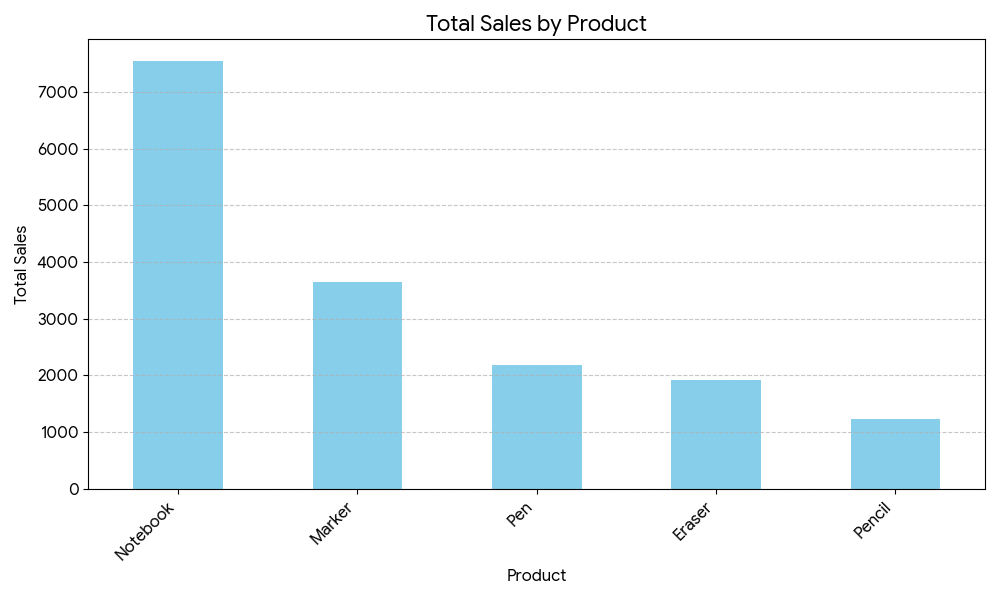

The Main formula here is:
=SUMPRODUCT((D2:D51="Notebook") * E2:E51 * F2:F51)

**8. Insert a line chart showing daily sales trend.**

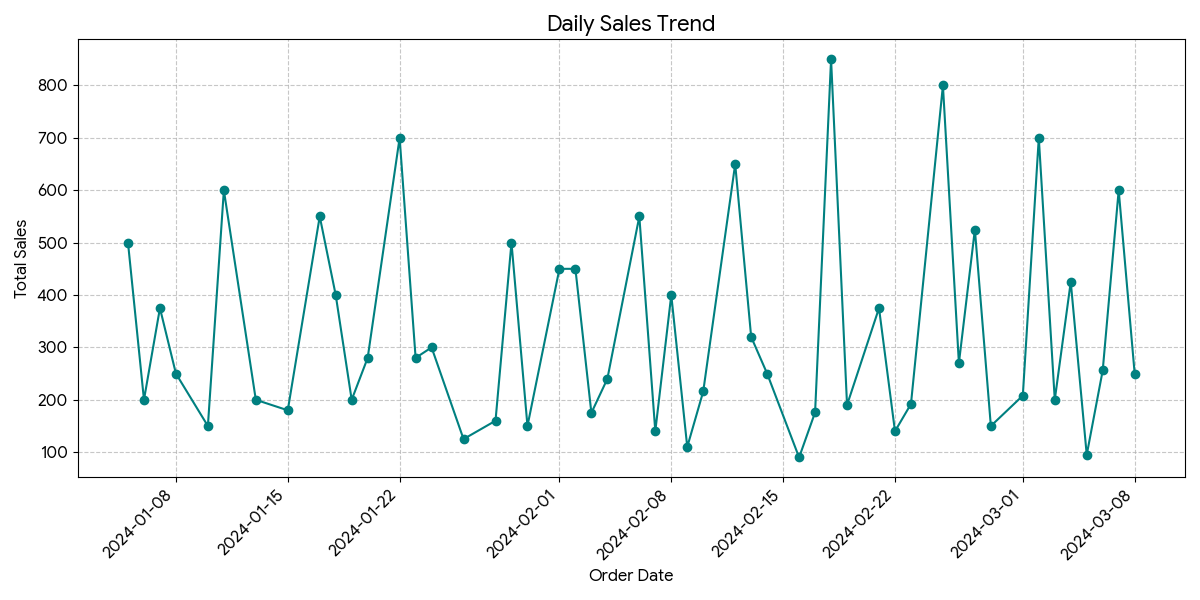

